In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
import math
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import preprocessing
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

# Colleges

In [3]:
csv_link = "https://raw.githubusercontent.com/UC-MACSS/persp-analysis/master/assignments/unsupervised-learning/data/College.csv"
colleges_pd = pd.read_csv(csv_link)

colleges_pd = colleges_pd.drop('Private', 1)
colleges = colleges_pd.values
pca = PCA()
projected = pca.fit_transform(colleges)

## 1. Perform PCA analysis on the college dataset and plot the first two principal components.

### Plotting Principal Component 1

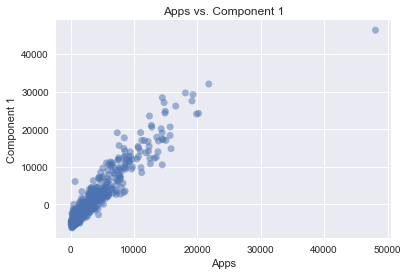

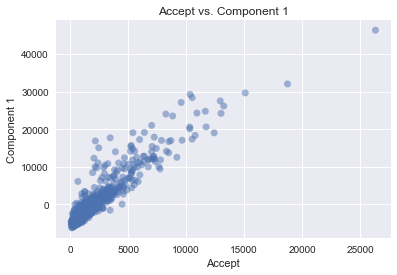

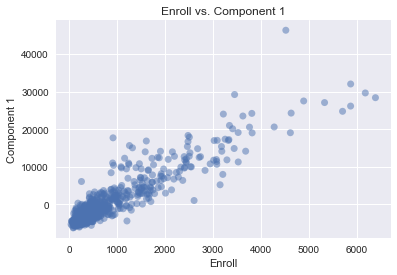

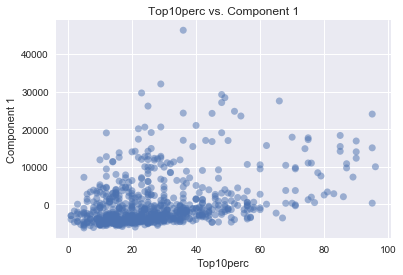

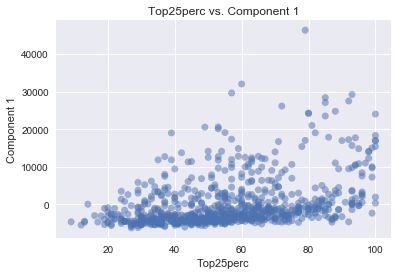

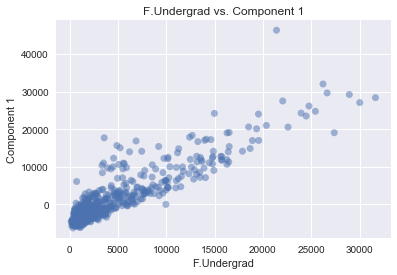

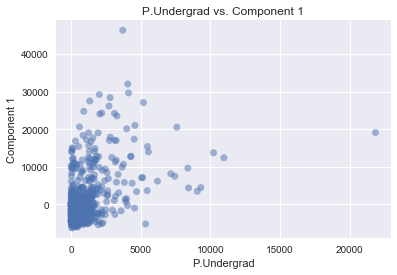

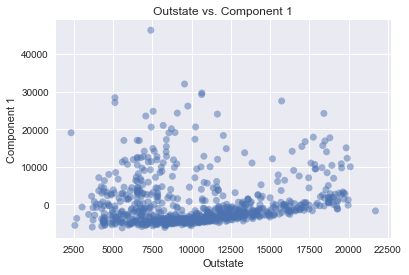

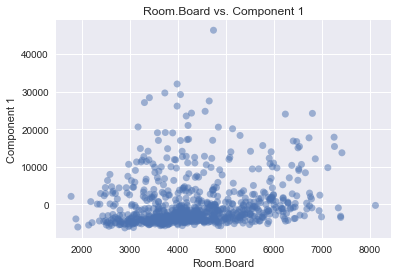

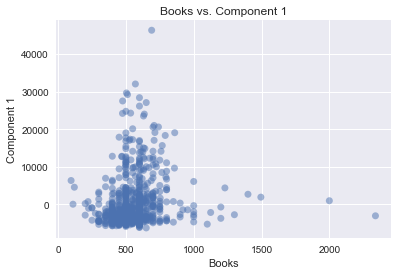

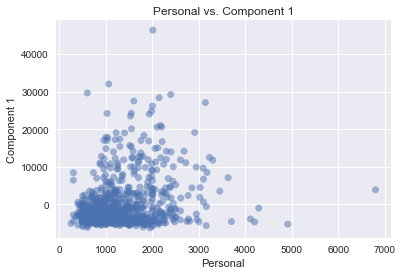

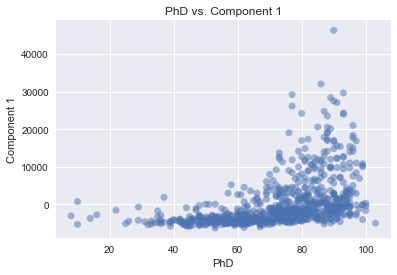

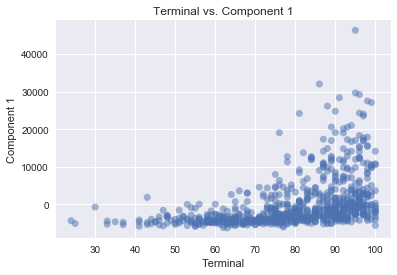

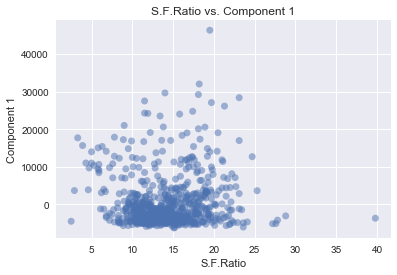

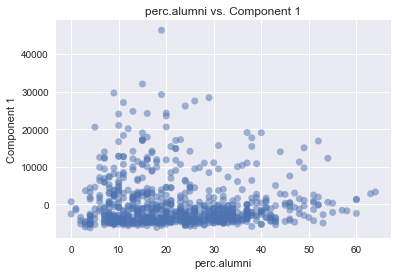

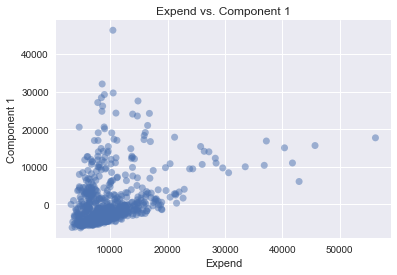

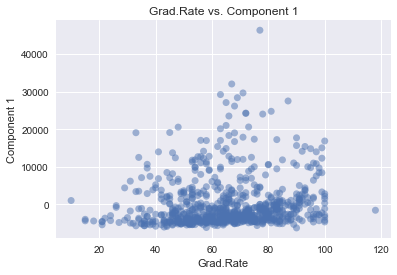

In [4]:

for i in range(colleges.shape[1]):
    plt.figure()
    plt.scatter(y = projected[:, 0], x = colleges[:,i], \
            edgecolor='none', alpha=0.5) #cmap=plt.cm.get_cmap('nipy_spectral', 5 ))
    plt.xlabel(colleges_pd.columns[i])
    plt.ylabel('Component 1')
    plt.title(colleges_pd.columns[i] + ' vs. Component 1')
    
# Code borrowed from the Python Data Science Handbook

### Plotting Principal Component 2

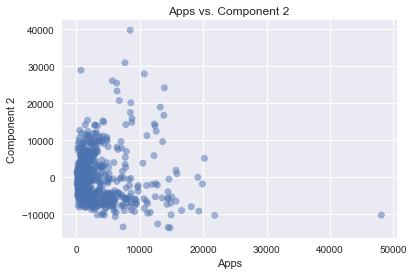

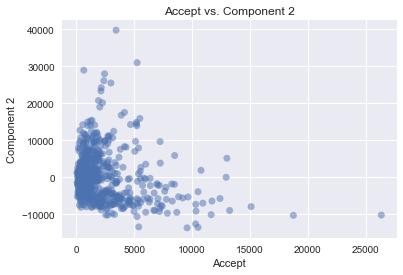

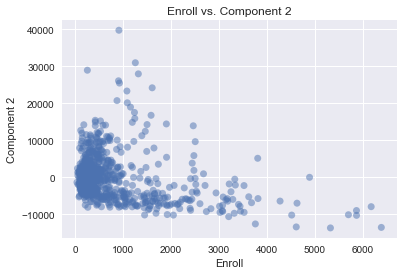

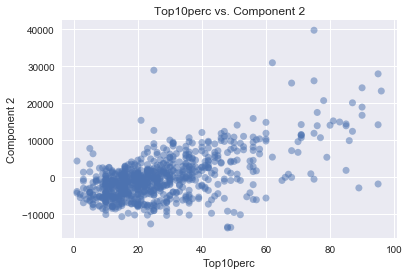

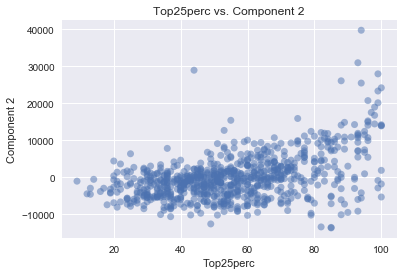

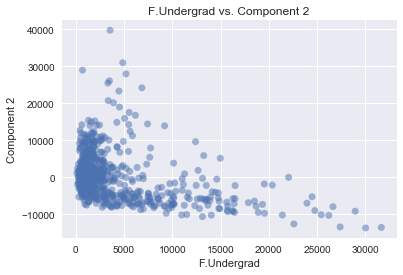

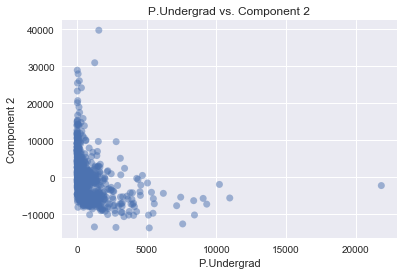

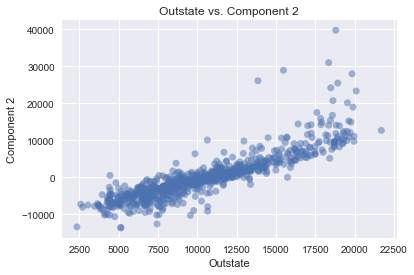

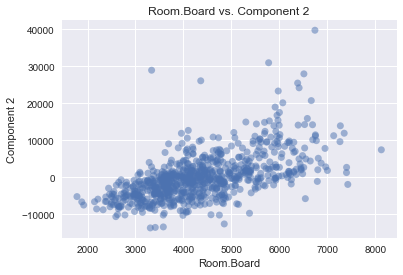

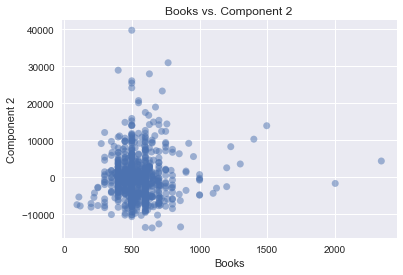

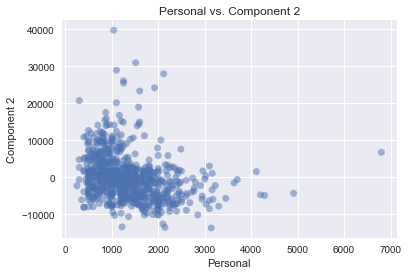

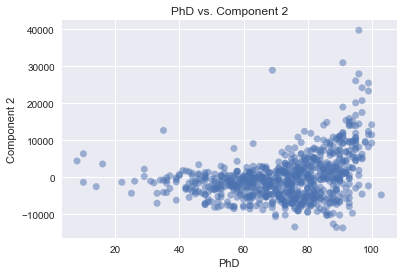

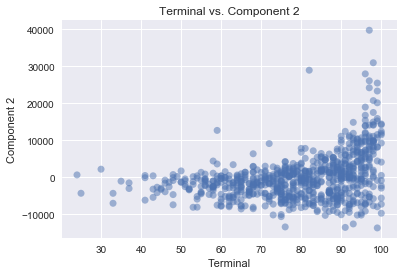

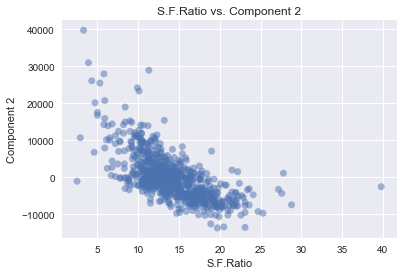

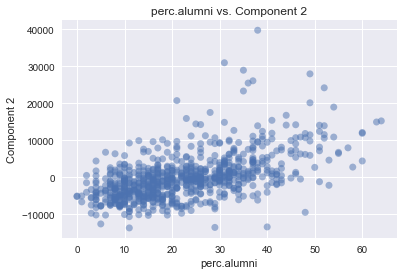

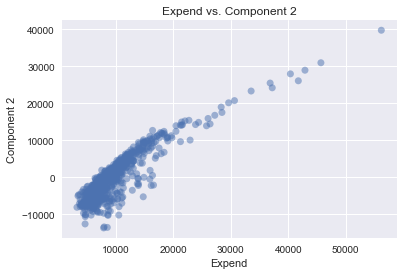

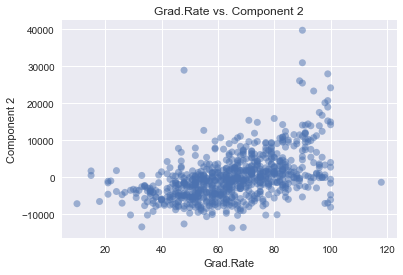

In [5]:
for i in range(colleges.shape[1]):
    plt.figure()
    plt.scatter(y = projected[:, 1], x = colleges[:,i], \
            edgecolor='none', alpha=0.5)
    plt.xlabel(colleges_pd.columns[i])
    plt.ylabel('Component 2')
    plt.title(colleges_pd.columns[i] + ' vs. Component 2')
    
# Code borrowed from the Python Data Science Handbook

### Drawing a Biplot

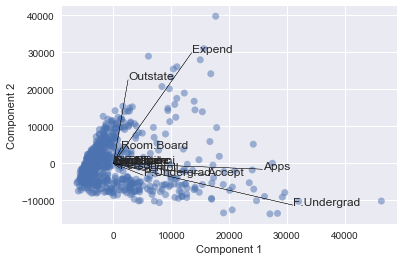

In [6]:
# Code based on examples at: 
# - https://github.com/teddyroland/python-biplot/blob/master/biplot.py
# - https://github.com/UC-MACSS/persp-analysis/blob/master/labs/PCA_Lab_Perspectives.ipynb

colleges_num = colleges_pd.values

pca = PCA(2) 
projected = pca.fit_transform(colleges_num)
plt.scatter(projected[:, 0], projected[:, 1], edgecolor='none', alpha=0.5)
plt.xlabel('Component 1')
plt.ylabel('Component 2')

maxs = max(pca.transform(colleges_num)[:,0])
maxys = max(pca.transform(colleges_num)[:,1])

varnum = 0
for i, j in pca.components_.transpose():  
    plt.text(i * maxs, j * maxys, colleges_pd.columns[varnum])
    plt.arrow(0, 0,i * maxs, j * maxys, color='black', width=0.005, head_width=0.0025)
    varnum += 1

##  Describe the results.

#### What variables appear strongly correlated on the first principal component?

Based on the series of scatterplots above, the most strongly correlated variables are:

   * the number of applications received (Apps);
   * the number of applications accepted (Accept);
   * the percentage of students who are full-time undergraduates (F.Undergrad);
   * the number of new students enrolled (Enroll).
     
However, when we review the biplot (above) we see that the number of applications and the number of full-time undergraduates appears to be more correlated than the number of enrollments or applications accepted. 

#### What about the second principal component?

Based on the series of scatterplots above, the most strongly correlated variables are:

   * the cost of out-of-state tuition (Outstate);
   * instructional expenditure per student (Expend).
     
Both of these values are clearly the most correlated, and this finding is confirmed by the biplot. 

#### Discussion

The first component identified by the PCA analysis may be approximating the "size" of the school. The number of applications received, students accepted, and enrollments are all indicators of new student interest and acquisition, while full-time enrollments are indicative of the year-to-year size of the school population. The number of full-time undergraduates being the most extreme value in the biplot's Component 1 axis reinforces this assertion. 

The second component may represent the financial resources of the institution. It is reasonable to assume that higher out-of-state tuition would be charged by better-resourced institutions, which would in turn spend more per-student. These institutions may be smaller and more research-focused - an assertion which can be confirmed based on the plot of Student-to-Faculty Ratio and Component 2 (S.F.Ratio vs Component 2). Here we see a negative trend, thus institutions which are higher in Component 2 appear to have more faculty per student.

## 2. Calculate the cumulative proportion of variance explained by all the principal components (see 10.2.3 in ISLR). 
### Approximately how much of the variance in College is explained by the first two principal components?

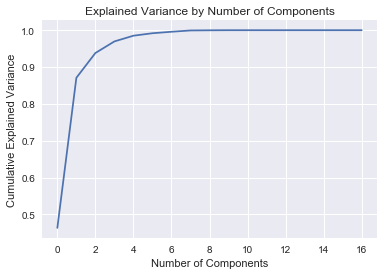

The first 2 variables explain 93.81 % of the variance in College.


In [7]:
pca = PCA().fit(colleges_num)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Components')
perc = round(np.sum(pca.explained_variance_ratio_[:3]),4) * 100
plt.show()
# Plotting code borrowed from The Python Data Science Handbook
print(("The first 2 variables explain {} % of the variance in College.").format(perc))

# Clustering States

## 1. Perform PCA on the dataset and plot the observations on the first and second principal components.

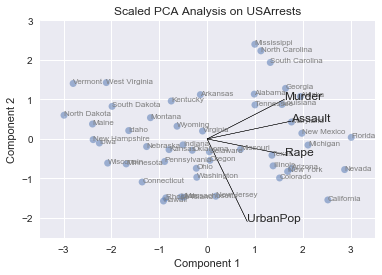

In [8]:
csv_link = "https://raw.githubusercontent.com/UC-MACSS/persp-analysis/master/assignments/unsupervised-learning/data/USArrests.csv"
crimes = pd.read_csv(csv_link)

# Code based on examples at: 
# - https://github.com/teddyroland/python-biplot/blob/master/biplot.py
# - https://github.com/UC-MACSS/persp-analysis/blob/master/labs/PCA_Lab_Perspectives.ipynb

cols = [i for i in crimes.columns if i not in ['State']]

def crime_pca(crimes_num, title, xmin, ymin):
    pca = PCA(2)  
    projected = pca.fit_transform(crimes_num)
    plt.scatter(projected[:, 0], projected[:, 1], edgecolor='none', alpha=0.5)
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.title(title)

    # Plot States
    statenum = 0
    for i, j in projected:
        plt.text(i, j, crimes.State[statenum], fontsize = 8, color = 'grey')
        statenum += 1

    maxs = max(pca.transform(crimes_num)[:,0])
    maxys = max(pca.transform(crimes_num)[:,1])

    # Plot arrows
    varnum = 1
    for i, j in pca.components_.transpose():  
        plt.text(i * maxs, j * maxys, crimes.columns[varnum])
        plt.arrow(0, 0,i * maxs, j * maxys, color='black', width=0.005, head_width=0.0025)
        varnum += 1
    plt.ylim(ymin[0], ymin[1])
    plt.xlim(xmin[0], xmin[1])
    plt.show()
    return pca
    
pca = crime_pca(crimes_num = preprocessing.scale(crimes[cols]), title = 'Scaled PCA Analysis on USArrests', xmin = (-3.5, 3.5), ymin = (-2.5, 3))

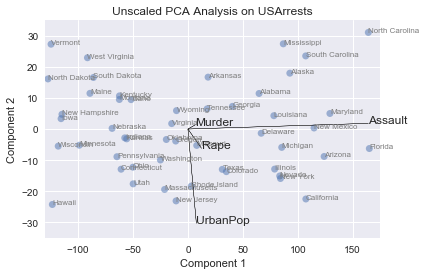

In [9]:
pca = crime_pca(crimes_num = crimes[cols], title = 'Unscaled PCA Analysis on USArrests', xmin = (-130, 175), ymin = (-35, 35))

## 2.  Perform $K$-means clustering with $K=2$. Plot the observations on the first and second principal components and color-code each state based on their cluster membership. Describe your results.

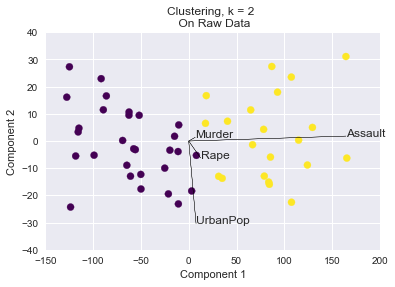

In [10]:

def k_means_crime(k, xmin, ymin):
    crimes_num = crimes[cols].values
    kmeans = KMeans(k)
    kmeans.fit(crimes[cols])
    y_kmeans = kmeans.predict(crimes[cols])
    pca = PCA(2)
    projected = pca.fit_transform(crimes_num)

    plt.scatter(projected[:, 0], projected[:, 1], c=y_kmeans, s=50, cmap='viridis')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.title('Clustering, k = ' + str(k) + ' \n On Raw Data')

    maxs = max(pca.transform(crimes_num)[:,0])
    maxys = max(pca.transform(crimes_num)[:,1])

    varnum = 1
    for i, j in pca.components_.transpose():  
        plt.text(i *maxs, j * maxys, crimes.columns[varnum])
        plt.arrow(0, 0,i * maxs, j * maxys, color='black', width=0.005, head_width=0.0025)
        varnum += 1
    plt.ylim(ymin[0], ymin[1])
    plt.xlim(xmin[0], xmin[1])
k_means_crime(2, xmin = (-150, 200), ymin = (-40, 40))

__Results Description__ 

We can see from this plot, with two clusters, that the USArrests data can be fairly easily divided into two types of states - those with high incidences of violent crime (Assault, Rape, Murder) and those with lower incidences of such crimes. 

##  3. Perform $K$-means clustering with $K=4$. Plot the observations on the first and second principal components and color-code each state based on their cluster membership. Describe your results.

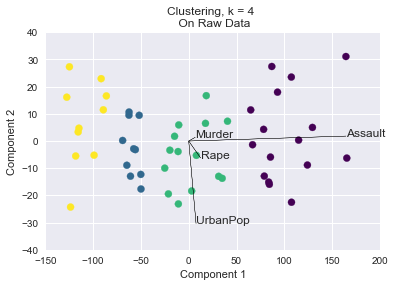

In [11]:
k_means_crime(4, xmin = (-150, 200), ymin = (-40, 40))

__Results Description__ 

We can see from this plot, with four clusters, that the USArrests data appears to split fairly evenly into four strata of states. More specifically, four tiers of criminality, with our high violent crime tier from the previous plot retaining most of its members. Some of the lower-positioned members of the high-tier have been re-assigne to the middle ground cluster. And the lower-incidence group from the previous plot has split into very low, moderately low, and middle group clusters. From this we might be able to hypothesize that locations with higher incidences of arrests (as a proxy for criminality), are more homogenous than the lower-incidence grouping. 

## 4. Perform $K$-means clustering with $K=3$. Plot the observations on the first and second principal components and color-code each state based on their cluster membership. Describe your results.

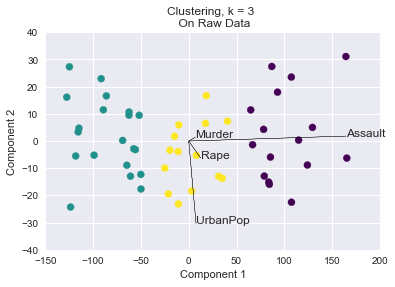

In [12]:
k_means_crime(3, xmin = (-150, 200), ymin = (-40, 40))

__Results Description__ 

Comparing this plot with the previous (four cluster) plot, it is interesting to note that nearly all the re-assignment of points has been within the lowest tier of arrests. In other words, the states with the highest number of arrests and a moderate amount of arrests are more homogenous than the lowest tier of states. This confirms the hypothesis made in the previous response. 

## 5.  Perform $K$-means clustering with $K=3$ on the first two principal components score vectors, rather than the raw data. Describe your results and compare them to the clustering results with $K=3$ based on the raw data.

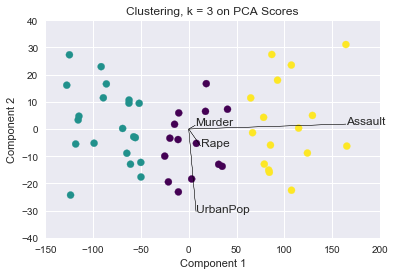

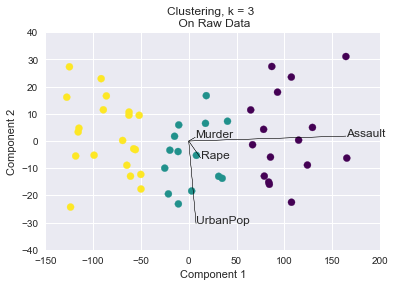

In [13]:
crimes_num = crimes[cols].values
pca = PCA(2).fit(crimes_num)
kmeans = KMeans(3)
kmeans.fit(pca.fit_transform(crimes_num))
y_kmeans = kmeans.predict(pca.fit_transform(crimes_num))

projected = pca.fit_transform(crimes_num)

plt.scatter(projected[:, 0], projected[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Clustering, k = 3 on PCA Scores')

maxs = max(pca.transform(crimes_num)[:,0])
maxys = max(pca.transform(crimes_num)[:,1])

varnum = 1
for i, j in pca.components_.transpose():  
    plt.text(i *maxs, j * maxys, crimes.columns[varnum])
    plt.arrow(0, 0,i * maxs, j * maxys, color='black', width=0.005, head_width=0.0025)
    varnum += 1
plt.ylim(-40, 40)
plt.xlim(-150, 200)
plt.show()
plt.figure()
k_means_crime(3, xmin = (-150, 200), ymin = (-40, 40))

__Results Description__ 

Once again, we see three clusters, with the lowest tier of arrest incidences having combined the two bottom tiers from the four-cluster plot. As above, this confirms the hypthesis offered in Question 3. 

Comparing the two plots above, we can see that clustering allows us to account for a number of the issues which PCA addresses. As the two plots are very similar, it becomes clear that cluster allows us to account for the relative importance or lack of importance of a particular variable in the same way PCA does. Thus we can understand these methods as complimentary, enabling us to use the same results for different purposes. For example, clustering is easily visualized, and provides an intuitive graphical description. PCA, by contrast, offers clear and easily accessible information on the relative importance of each variable to explaining variance in the dataset - an explantory or inferential feature that clustering does not offer so readily. 


## 6. Using hierarchical clustering with complete linkage and Euclidean distance, cluster the states.

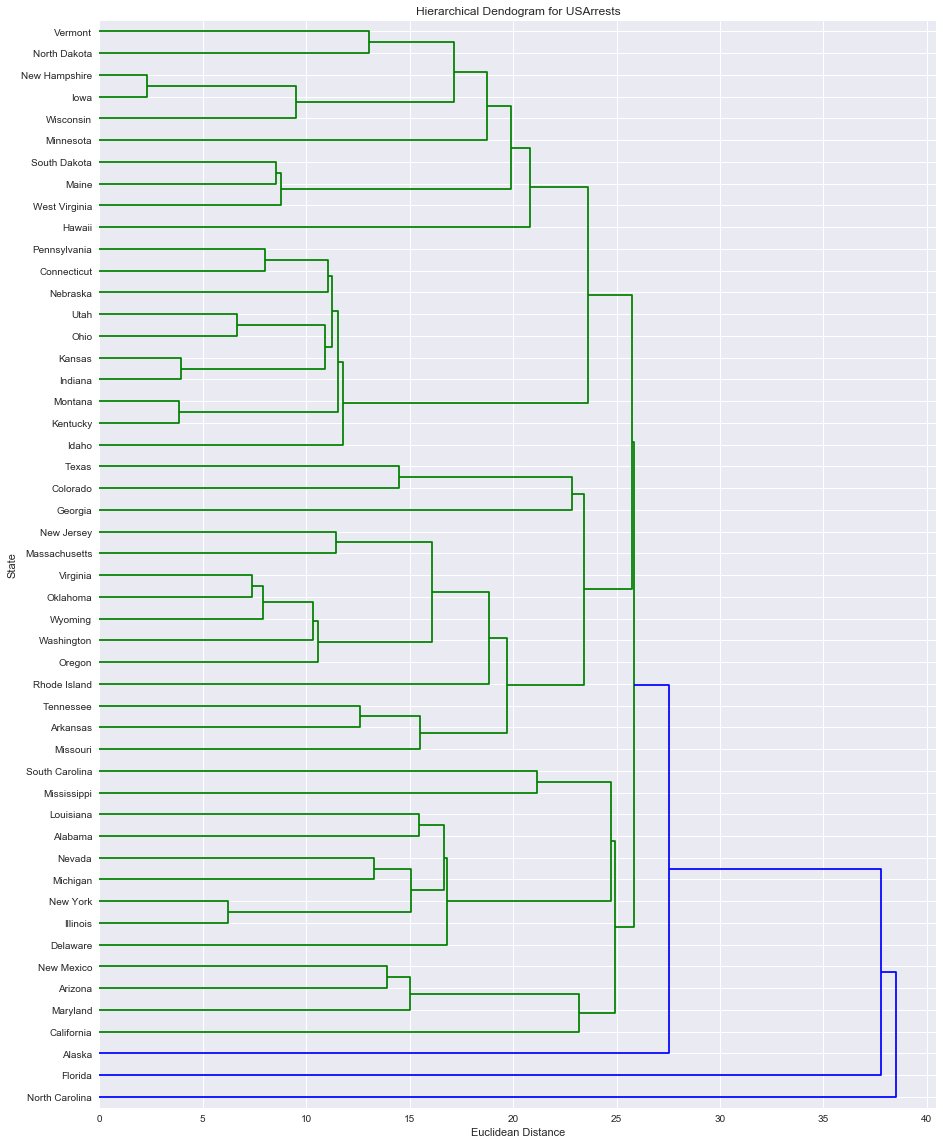

In [14]:
# Code adapted from: https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/
crimes_dend = crimes[cols].values
label_list = crimes.State.unique()
links = linkage(crimes_dend) # Default is euclidean
plt.figure(figsize=(15, 20))
plt.title('Hierarchical Dendogram for USArrests')
plt.ylabel('State')
plt.xlabel('Euclidean Distance')
dendrogram(
    links,
    leaf_font_size=10, 
    labels = label_list,
    orientation = 'right'
)
plt.show()

## 7. Cut the dendrogram at a height that results in three distinct clusters. Which states belong to which clusters?

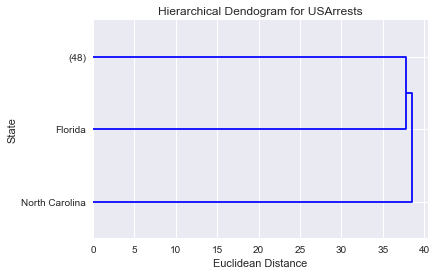

In [15]:
# Code adapted from: https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/
crimes_dend = crimes[cols].values
label_list = crimes.State.unique()
links = linkage(crimes_dend) # Default is euclidean
plt.figure()
plt.title('Hierarchical Dendogram for USArrests')
plt.ylabel('State')
plt.xlabel('Euclidean Distance')
dendrogram(
    links,
    leaf_font_size=10,  # font size for the x axis labels
    labels = label_list,
    orientation = 'right',
    truncate_mode = 'lastp',
    p = 3
)
plt.show()

In [16]:
solos = ['Florida', 'North Carolina']
grouped = [i for i in label_list if i not in solos]
print('{} and {} each form  two separate clusters, while the remaining states are included in the \n third cluster.\n\n\
Other States: \n{}'.format(solos[0], solos[1], ", ".join(grouped) ))

Florida and North Carolina each form  two separate clusters, while the remaining states are included in the 
 third cluster.

Other States: 
Alabama, Alaska, Arizona, Arkansas, California, Colorado, Connecticut, Delaware, Georgia, Hawaii, Idaho, Illinois, Indiana, Iowa, Kansas, Kentucky, Louisiana, Maine, Maryland, Massachusetts, Michigan, Minnesota, Mississippi, Missouri, Montana, Nebraska, Nevada, New Hampshire, New Jersey, New Mexico, New York, North Dakota, Ohio, Oklahoma, Oregon, Pennsylvania, Rhode Island, South Carolina, South Dakota, Tennessee, Texas, Utah, Vermont, Virginia, Washington, West Virginia, Wisconsin, Wyoming


## 8. Hierarchically cluster the states using complete linkage and Euclidean distance, after scaling the variables to have standard deviation $1$. What effect does scaling the variables have on the hierarchical clustering obtained?

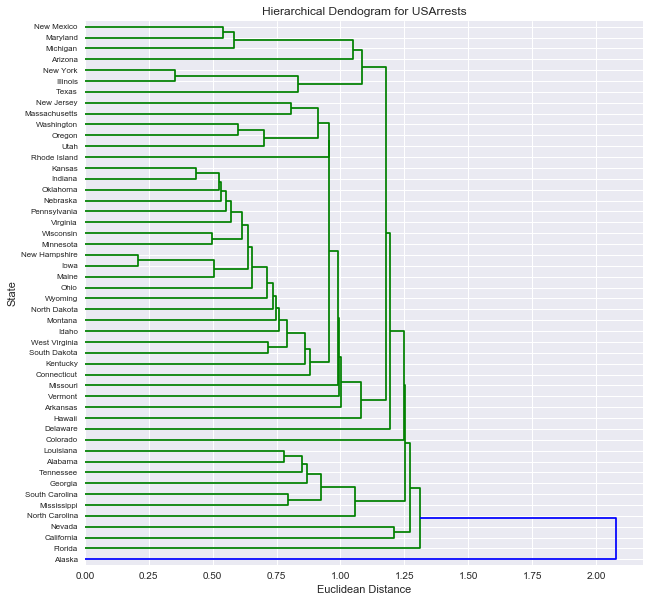

In [17]:
# Code adapted from: https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/
# Additional reference: http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
crimes_dend = crimes[cols].values
scaler = StandardScaler(with_std = True)
scaler.fit(crimes_dend)
crimes_dend = scaler.transform(crimes_dend)
label_list = crimes.State.unique()
links = linkage(crimes_dend) # Default is euclidean
plt.figure(figsize=(10, 10))
plt.title('Hierarchical Dendogram for USArrests')
plt.ylabel('State')
plt.xlabel('Euclidean Distance')
dendrogram(
    links,
    leaf_font_size=8.,  # font size for the x axis labels
    labels = label_list,
    orientation = 'right'
)
plt.show()

__Comment__

Scaling the variables before clustering allows for more ordered clusters and reduces the number of outliers (from three to one). This in turn would offer a more representative clustering of data points based on observed characteristics. For example, outlier states which we know from our own heuristics (around population, culture, etc.) are comparable to non-outlier states (e.g., Florida, North Carolina) are now incorporated. "Stubborn" outlier states (e.g., Alaska) which are unique in their characteristics (e.g., very low population) remain outliers. 